# India House Price data

In [1]:
# ! pip install matplotlib==3.7.3

In [72]:
import sys
import os
import pandas as pd
import seaborn as sns
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))

module_path = Path.cwd().parent
# print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
# print(sys.path)
import settings
# from kaggle import settingsb
%matplotlib inline

In [73]:
import matplotlib
matplotlib.__version__

'3.7.3'

In [79]:
! poetry show | grep matplotlib

matplotlib                               3.7.3        Python plotting package
matplotlib-inline                        0.1.6        Inline Matplotlib bac...


In [80]:
! pip freeze | grep matplotlib

matplotlib==3.7.1
matplotlib-inline @ file:///home/conda/feedstock_root/build_artifacts/matplotlib-inline_1660814786464/work


## Configuration

In [81]:
csv_file = settings.DATA_FOLDER /'house_prices_clean.csv'

In [82]:
df = pd.read_csv(csv_file)

df.shape

(29451, 15)

In [83]:
df.sample(5)

,under_construction,rera,bhk_no,square_ft,ready_to_move,resale,address,longitude,latitude,targetprice_in_lacs,posted_by_Builder,posted_by_Dealer,posted_by_Owner,bhk_or_rk_BHK,bhk_or_rk_RK
12739,0,0,3,"2,199.95",1,1,"Thevara,Kochi",9.94,76.30,180.00,0,1,0,1,0
24195,0,0,3,"1,230.01",1,1,"Katraj Kondhwa Road,Pune",18.43,73.85,90.00,0,1,0,1,0
24324,1,1,2,700.00,0,0,"Jaitala,Maharashtra",20.13,76.53,24.50,1,0,0,1,0
29297,0,0,1,410.02,1,1,"Behind MIG Police Station,Indore",28.76,77.50,18.00,0,0,1,1,0
7542,0,0,2,756.19,1,1,"Agarpara,Kolkata",22.68,88.37,16.50,0,0,1,1,0


## EDA

In [84]:
df.isna().sum()

under_construction     0
rera                   0
bhk_no                 0
square_ft              0
ready_to_move          0
resale                 0
address                0
longitude              0
latitude               0
targetprice_in_lacs    0
posted_by_Builder      0
posted_by_Dealer       0
posted_by_Owner        0
bhk_or_rk_BHK          0
bhk_or_rk_RK           0
dtype: int64

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   under_construction   29451 non-null  int64  
 1   rera                 29451 non-null  int64  
 2   bhk_no               29451 non-null  int64  
 3   square_ft            29451 non-null  float64
 4   ready_to_move        29451 non-null  int64  
 5   resale               29451 non-null  int64  
 6   address              29451 non-null  object 
 7   longitude            29451 non-null  float64
 8   latitude             29451 non-null  float64
 9   targetprice_in_lacs  29451 non-null  float64
 10  posted_by_Builder    29451 non-null  int64  
 11  posted_by_Dealer     29451 non-null  int64  
 12  posted_by_Owner      29451 non-null  int64  
 13  bhk_or_rk_BHK        29451 non-null  int64  
 14  bhk_or_rk_RK         29451 non-null  int64  
dtypes: float64(4), int64(10), object(1)


In [86]:
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
df.describe()

,under_construction,rera,bhk_no,square_ft,ready_to_move,resale,longitude,latitude,targetprice_in_lacs,posted_by_Builder,posted_by_Dealer,posted_by_Owner,bhk_or_rk_BHK,bhk_or_rk_RK
count,"29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00","29,451.00"
mean,0.18,0.32,2.39,"19,802.17",0.82,0.93,21.30,76.84,142.90,0.02,0.62,0.36,1.00,0.00
std,0.38,0.47,0.88,"1,901,334.91",0.38,0.26,6.21,10.56,656.88,0.14,0.49,0.48,0.03,0.03
min,0.00,0.00,1.00,3.00,0.00,0.00,-37.71,-121.76,0.25,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,2.00,900.02,1.00,1.00,18.45,73.80,38.00,0.00,0.00,0.00,1.00,0.00
50%,0.00,0.00,2.00,"1,175.06",1.00,1.00,20.75,77.32,62.00,0.00,1.00,0.00,1.00,0.00
75%,0.00,1.00,3.00,"1,550.69",1.00,1.00,26.90,77.83,100.00,0.00,1.00,1.00,1.00,0.00
max,1.00,1.00,20.00,"254,545,454.50",1.00,1.00,59.91,152.96,"30,000.00",1.00,1.00,1.00,1.00,1.00


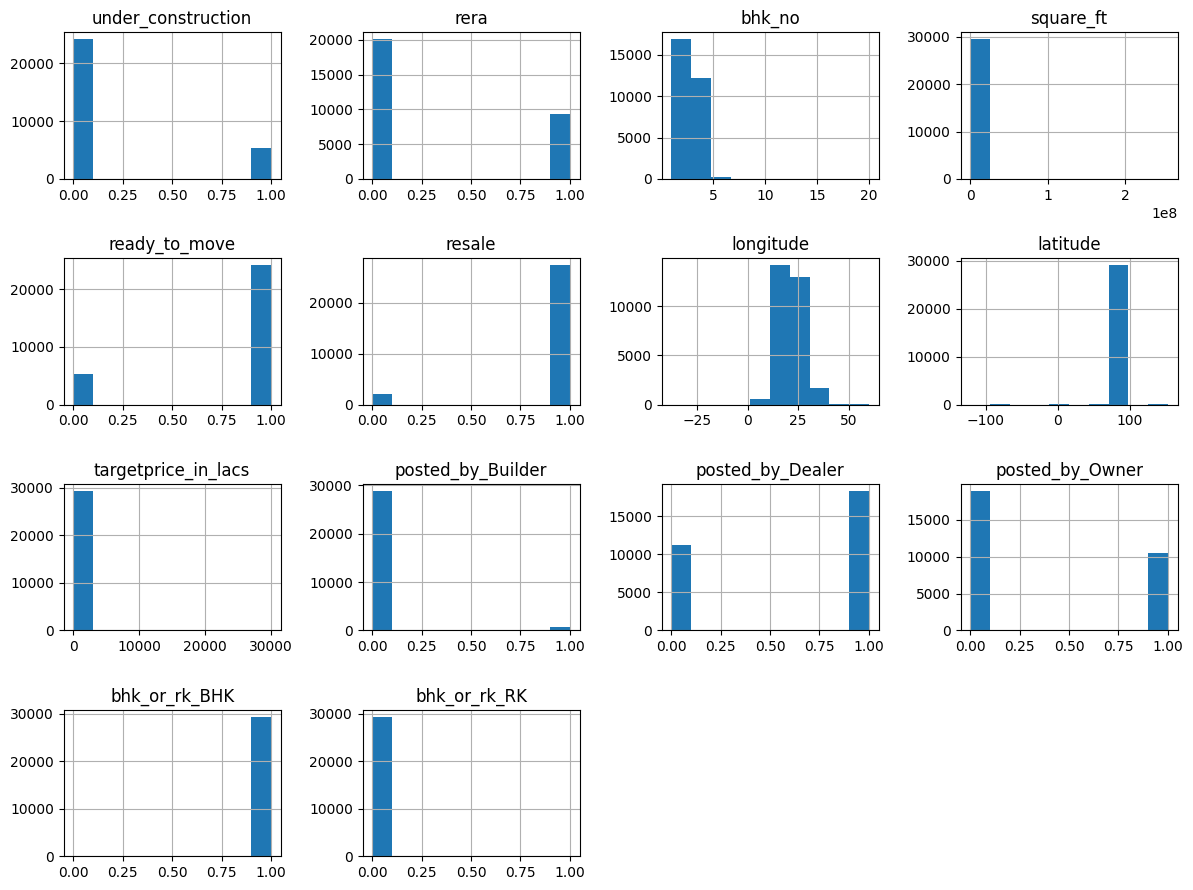

In [87]:
df.hist(figsize=(12,9))
plt.tight_layout()
plt.show()

/home/luiscberrocal/.cache/pypoetry/virtualenvs/hacktoberfest-2023-project-kKWlZqzn-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/luiscberrocal/.cache/pypoetry/virtualenvs/hacktoberfest-2023-project-kKWlZqzn-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/luiscberrocal/.cache/pypoetry/virtualenvs/hacktoberfest-2023-project-kKWlZqzn-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/

<Axes: >

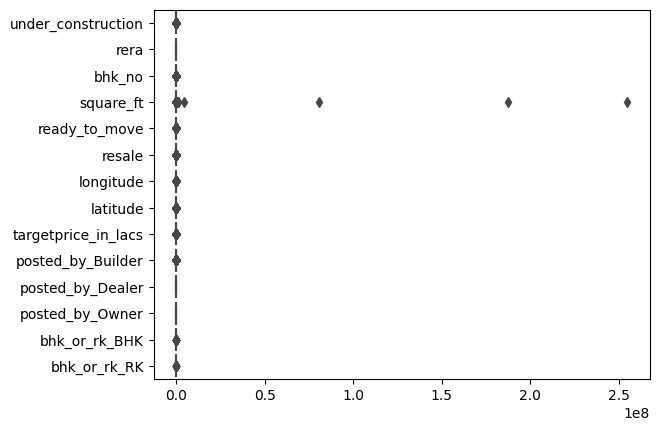

In [88]:
sns.boxplot(data=df, orient='h')

### Categories

In [71]:

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().round(2), annot=True, cmap='YlGnBu', annot_kws={"size": 10})
#sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

ValueError: could not convert string to float: 'Ksfc Layout,Bangalore'

<Figure size 2000x1000 with 0 Axes>

In [15]:
import matplotlib
print(f'Pandas    : {pd.__version__}')
print(f'Seaborn   : {sns.__version__}')
print(f'Matplotlib: {matplotlib.__version__}')

Pandas    : 2.1.1
Seaborn   : 0.12.2
Matplotlib: 3.7.3


In [16]:
! cat /etc/os-release

NAME="Pop!_OS"
VERSION="22.04 LTS"
ID=pop
ID_LIKE="ubuntu debian"
PRETTY_NAME="Pop!_OS 22.04 LTS"
VERSION_ID="22.04"
HOME_URL="https://pop.system76.com"
SUPPORT_URL="https://support.system76.com"
BUG_REPORT_URL="https://github.com/pop-os/pop/issues"
PRIVACY_POLICY_URL="https://system76.com/privacy"
VERSION_CODENAME=jammy
UBUNTU_CODENAME=jammy
LOGO=distributor-logo-pop-os
